In [384]:
import pandas as pd
import glob
import os
import numpy as np
from matplotlib import pyplot
import seaborn as sns

In [385]:
RESULT_DIR = "./results/results_paper"

In [386]:
def get_latest_results_file(result_dir):    
    list_of_files = glob.glob(result_dir + '/*.csv') 
    latest_file = None
    if list_of_files:
        latest_file = max(list_of_files, key=os.path.getmtime)
    return latest_file

In [387]:
results_file = get_latest_results_file(RESULT_DIR)
df = pd.read_csv(results_file, header=[0])
display(df)

,dataset,optimizer,iteration,variation,runtime
0,Adiac,adam-1000-1,2_1304606831834338190,0.633249,625.493321
1,Adiac,adam-1000-1,0_635570499007058849,0.622548,654.829476
2,Adiac,adam-1000-1,1_370465051410731942,0.647986,654.463301
3,Adiac,adam-1000-1,3_1464982147617559500,0.612679,650.329337
4,Adiac,adam-1000-1,4_169887742225322971,0.645335,661.835801
...,...,...,...,...,...
3175,Yoga,ssg-1000-10,23_1077450478315035026,63.924642,10245.186050
3176,Yoga,ssg-1000-10,27_2075359535103138258,151.261029,9793.992317
3177,Yoga,ssg-1000-10,24_1658203724013296139,49.956384,10296.984940
3178,Yoga,ssg-1000-10,29_1289372548475837026,50.805263,9924.076514


In [388]:
filter_func = lambda x: x['iteration'].count() != 30 or x['variation'].count() != 30 or x['runtime'].count() != 30
df.groupby(['dataset', 'optimizer']).filter(filter_func)

,dataset,optimizer,iteration,variation,runtime


In [389]:
unfinshed_datasets = df.groupby(['dataset', 'optimizer']).filter(filter_func)['dataset'].unique()
unfinshed_datasets

array([], dtype=object)

In [390]:
# df[df.dataset == "Adiac"].groupby('optimizer').count()

In [391]:
filter_datasets = list(unfinshed_datasets)#  + ['FaceFour']
filter_datasets

[]

In [392]:
df_filtered = df[~df.dataset.isin(filter_datasets)]

In [393]:
relevant_optimizers = ["adam-1000-1", "adam-1000-10", "ssg-1000-1", "ssg-1000-10"]
df_filtered = df_filtered[df_filtered.optimizer.isin(relevant_optimizers)]

In [394]:
df_grouped = df_filtered.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])
display(df_grouped)

variation                 runtime             
                            mean        std         mean          std
dataset optimizer                                                    
Adiac   adam-1000-1     0.633448   0.017109   714.972988    88.441117
        adam-1000-10    0.880984   0.225950   669.816043    64.668517
        ssg-1000-1      0.560179   0.024561   741.406121    64.424078
        ssg-1000-10     0.861466   0.198611   688.938305    84.089346
Beef    adam-1000-1    42.703718  13.239729  2980.325716   169.624181
...                          ...        ...          ...          ...
Wafer   ssg-1000-10   127.371288  43.093162  1939.240578    37.448281
Yoga    adam-1000-1    79.196030  34.898173  9688.428981  1040.494869
        adam-1000-10   69.777681  33.708336  5395.963257   163.869233
        ssg-1000-1     63.630133  19.840079  9771.535562   306.292315
        ssg-1000-10    73.153503  32.621772  9964.573257   293.828635

[96 rows x 4 columns]

In [395]:
df_variation = df_filtered.drop(columns=['runtime'])
df_variation.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])

variation           
                            mean        std
dataset optimizer                          
Adiac   adam-1000-1     0.633448   0.017109
        adam-1000-10    0.880984   0.225950
        ssg-1000-1      0.560179   0.024561
        ssg-1000-10     0.861466   0.198611
Beef    adam-1000-1    42.703718  13.239729
...                          ...        ...
Wafer   ssg-1000-10   127.371288  43.093162
Yoga    adam-1000-1    79.196030  34.898173
        adam-1000-10   69.777681  33.708336
        ssg-1000-1     63.630133  19.840079
        ssg-1000-10    73.153503  32.621772

[96 rows x 2 columns]

In [396]:
df_plot = df_variation.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])
df_plot.columns = df_plot.columns.to_flat_index()
df_plot.reset_index(inplace=True)

df_plot = pd.melt(df_plot, id_vars=['dataset', 'optimizer'])
display(df_plot)

,dataset,optimizer,variable,value
0,Adiac,adam-1000-1,"(variation, mean)",0.633448
1,Adiac,adam-1000-10,"(variation, mean)",0.880984
2,Adiac,ssg-1000-1,"(variation, mean)",0.560179
3,Adiac,ssg-1000-10,"(variation, mean)",0.861466
4,Beef,adam-1000-1,"(variation, mean)",42.703718
...,...,...,...,...
187,Wafer,ssg-1000-10,"(variation, std)",43.093162
188,Yoga,adam-1000-1,"(variation, std)",34.898173
189,Yoga,adam-1000-10,"(variation, std)",33.708336
190,Yoga,ssg-1000-1,"(variation, std)",19.840079


In [397]:
df_dataset_means = df_plot.groupby(['dataset', 'variable']).mean()
df_dataset_means.columns = df_dataset_means.columns.to_flat_index()
df_dataset_means.reset_index(inplace=True)

df_dataset_means['optimizer'] = 'dataset_mean'
df_dataset_means

,dataset,variable,value,optimizer
0,Adiac,"(variation, mean)",0.734019,dataset_mean
1,Adiac,"(variation, std)",0.116558,dataset_mean
2,Beef,"(variation, mean)",48.954021,dataset_mean
3,Beef,"(variation, std)",30.442946,dataset_mean
4,CBF,"(variation, mean)",22.541698,dataset_mean
5,CBF,"(variation, std)",1.930892,dataset_mean
6,ChlorineConcentration,"(variation, mean)",34.043551,dataset_mean
7,ChlorineConcentration,"(variation, std)",31.530486,dataset_mean
8,Coffee,"(variation, mean)",0.804385,dataset_mean
9,Coffee,"(variation, std)",0.087401,dataset_mean


In [398]:
df_plot_relative = pd.concat([df_plot, df_dataset_means], sort=True)
df_plot_relative['value'] = df_plot_relative.groupby(['dataset', 'variable']).transform(lambda x: x / x.mean())
df_plot_relative

,dataset,optimizer,value,variable
0,Adiac,adam-1000-1,0.862986,"(variation, mean)"
1,Adiac,adam-1000-10,1.200219,"(variation, mean)"
2,Adiac,ssg-1000-1,0.763166,"(variation, mean)"
3,Adiac,ssg-1000-10,1.173628,"(variation, mean)"
4,Beef,adam-1000-1,0.872323,"(variation, mean)"
...,...,...,...,...
43,TwoPatterns,dataset_mean,1.000000,"(variation, std)"
44,Wafer,dataset_mean,1.000000,"(variation, mean)"
45,Wafer,dataset_mean,1.000000,"(variation, std)"
46,Yoga,dataset_mean,1.000000,"(variation, mean)"


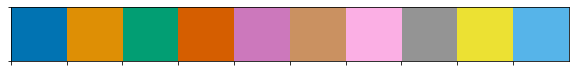

In [399]:
sns.palplot(sns.color_palette("colorblind"))

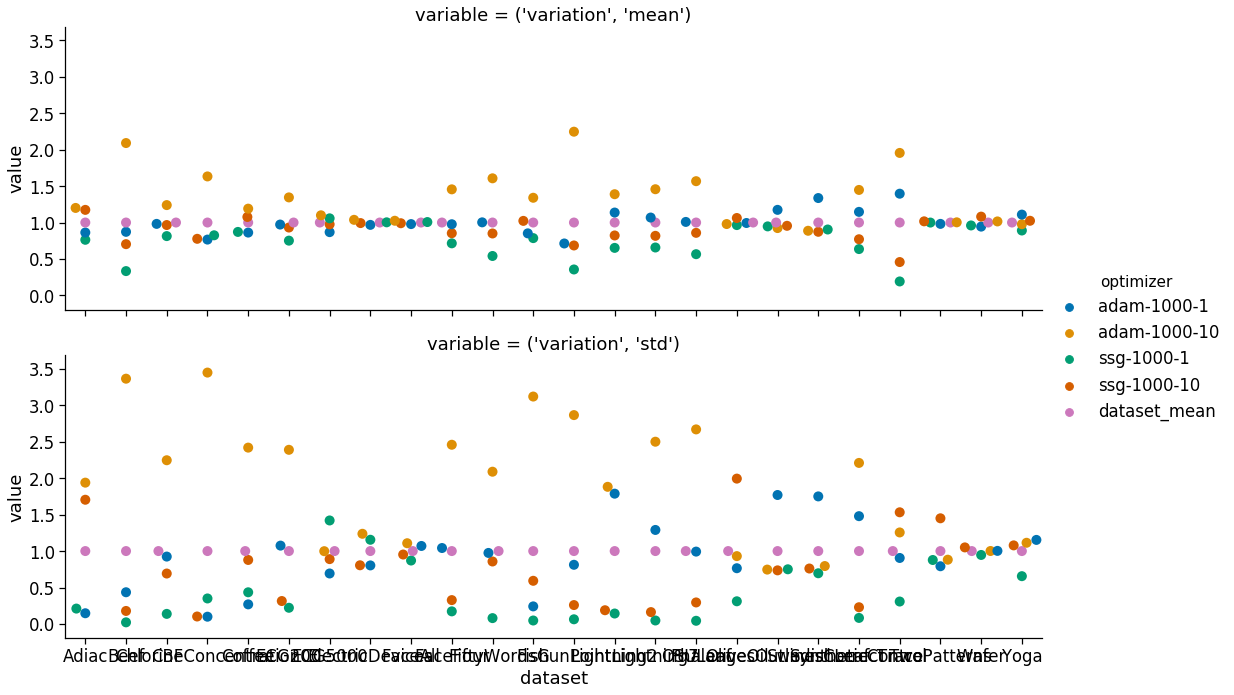

In [400]:
with sns.plotting_context('notebook', font_scale=1.5):
    sns.catplot(x='dataset', y='value', hue='optimizer', row='variable', data=df_plot_relative, height=5, aspect=3, s=10, kind='swarm', palette='colorblind')

In [401]:
REFERENCE_FILE = "reference/5-sets_reference-results.csv"
df_r = pd.read_csv(REFERENCE_FILE)
df_r.groupby(['dataset']).mean()

,mean,std
dataset,,
Adiac,0.588,0.0140
Beef,23.830,3.4000
CBF,19.300,0.5940
ChlorineConcentration,15.396,0.5420
FiftyWords,21.382,1.7676


In [402]:
df_sign = df.copy()
df_sign['variation_sign'] = np.sign(df.variation)
df_sign.groupby(['dataset', 'optimizer']).variation_sign.value_counts().unstack()

variation_sign        1.0
dataset optimizer        
Adiac   adam-1000-1    30
        adam-1000-10   30
        sgld-1000-10   30
        ssg-1000-1     30
        ssg-1000-10    30
...                   ...
Wafer   ssg-1000-10    30
Yoga    adam-1000-1    30
        adam-1000-10   30
        ssg-1000-1     30
        ssg-1000-10    30

[106 rows x 1 columns]